# Îç∞Ïù¥ÌÑ∞ ÏàòÏßë

In [1]:
import yfinance as yf
import pandas as pd

def yuan_indicator():
    tickers = {
    "Shanghai Composite": "000001.SS",
    "Shenzhen Component": "399001.SZ",
    "Hang Seng": "^HSI",
    "Hang Seng China Enterprises": "^HSCE"
    }
    
    data_list = []
    
    for name, symbol in tickers.items():
        ticker = yf.Ticker(symbol)
        df = ticker.history(period="25y", interval="1d")
        df = df.reset_index()
        
    
        df = df[["Date", "Open", "High", "Low", "Close"]]
        df = df.rename(columns={
            "Open": f"{name}_Open",
            "High": f"{name}_High",
            "Low": f"{name}_Low",
            "Close": f"{name}_Close"
        })
        df["Date"] = pd.to_datetime(df["Date"]).dt.tz_localize(None)
        data_list.append(df)
    
    df_merged = data_list[0]
    for df in data_list[1:]:
        df['Date']=pd.to_datetime(df['Date'])
        df_merged = pd.merge(df_merged, df, on="Date", how="inner")
    
    df_merged['Date'] = pd.to_datetime(df_merged['Date']).dt.strftime('%Y-%m-%d')
    df_merged['Date'] = pd.to_datetime(df_merged['Date'])
    return df_merged

In [2]:
import cloudpickle
with open("yuan_indicator.pkl", "wb") as f:
    cloudpickle.dump(yuan_indicator, f)

In [3]:
yuan_indi_df=yuan_indicator()

In [4]:
yuan_df=pd.read_csv('CNY_KRW Í≥ºÍ±∞ Îç∞Ïù¥ÌÑ∞.csv')
yuan_df

ÎÇ†Ïßú      Ï¢ÖÍ∞Ä      ÏãúÍ∞Ä      Í≥†Í∞Ä      Ï†ÄÍ∞Ä  Í±∞ÎûòÎüâ    Î≥ÄÎèô %
0     2025- 07- 29  194.08  193.55  194.20  193.55  NaN   0.27%
1     2025- 07- 28  193.55  193.00  193.77  192.18  NaN   0.26%
2     2025- 07- 27  193.04  192.88  193.04  192.88  NaN   0.01%
3     2025- 07- 25  193.03  191.50  193.22  191.50  NaN   0.59%
4     2025- 07- 24  191.89  191.67  192.08  190.87  NaN  -0.07%
...            ...     ...     ...     ...     ...  ...     ...
4843  2007- 01- 05  119.66  119.28  119.77  119.12  NaN   0.29%
4844  2007- 01- 04  119.31  119.19  119.45  119.06  NaN   0.69%
4845  2007- 01- 03  118.49  118.37  118.60  118.34  NaN   0.06%
4846  2007- 01- 02  118.42  118.62  118.76  118.36  NaN  -0.47%
4847  2007- 01- 01  118.98  118.98  118.98  118.98  NaN  -0.12%

[4848 rows x 7 columns]

In [5]:
yuan_df['Î≥ÄÎèô %']=yuan_df['Î≥ÄÎèô %'].apply(lambda x: x.replace('%','')).astype(float)
yuan_df=yuan_df.drop('Í±∞ÎûòÎüâ',axis=1)
yuan_df=yuan_df.rename(columns={'ÎÇ†Ïßú':'Date','Ï¢ÖÍ∞Ä':'Close','ÏãúÍ∞Ä':'Open','Ï†ÄÍ∞Ä':'Low','Í≥†Í∞Ä':'High','Î≥ÄÎèô %':'Change'})

import datetime as dt
yuan_df['Date']=pd.to_datetime(pd.to_datetime(yuan_df['Date'],format='%Y- %m- %d').dt.strftime('%Y-%m-%d'))

In [6]:
yuan_df=yuan_df.sort_values('Date',ascending=True,ignore_index=True)

In [7]:
def CNYKRW():
    from selenium import webdriver
    from selenium.webdriver.chrome.service import Service
    from selenium.webdriver.common.by import By
    from datetime import datetime
    import pandas as pd
    import time

    df = pd.DataFrame(columns=["Date", "Close", "Open", "High", "Low", "Change"])
    
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    options.add_argument("--no-sandbox")
    options.add_argument("--disable-dev-shm-usage")
    service = Service()
    
    driver = webdriver.Chrome(service=service, options=options)
    url = "https://kr.investing.com/currencies/cny-krw-historical-data"
    driver.get(url)
    time.sleep(5)

    def clean_number(text):
        return float(text.replace(',', '').replace('%', ''))

    for row in range(1, 3):  # tr[1], tr[2]
        try:
            date_xpath = f'//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[2]/div[3]/table/tbody/tr[{row}]/td[1]'
            close_xpath = f'//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[2]/div[3]/table/tbody/tr[{row}]/td[2]'
            open_xpath = f'//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[2]/div[3]/table/tbody/tr[{row}]/td[3]'
            high_xpath = f'//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[2]/div[3]/table/tbody/tr[{row}]/td[4]'
            low_xpath = f'//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[2]/div[3]/table/tbody/tr[{row}]/td[5]'
            change_xpath = f'//*[@id="__next"]/div[2]/div[2]/div[2]/div[1]/div[2]/div[3]/table/tbody/tr[{row}]/td[7]'

            date = driver.find_element(By.XPATH, date_xpath).text
            close = driver.find_element(By.XPATH, close_xpath).text
            open_ = driver.find_element(By.XPATH, open_xpath).text
            high = driver.find_element(By.XPATH, high_xpath).text
            low = driver.find_element(By.XPATH, low_xpath).text
            change = driver.find_element(By.XPATH, change_xpath).text

            # ÎÇ†Ïßú Î≥ÄÌôò
            date = datetime.strptime(date.replace('Ïõî', '-'), '%m- %d, %Y').date()

            new_row = {
                "Date": pd.to_datetime(date).normalize(),
                "Close": clean_number(close),
                "Open": clean_number(open_),
                "High": clean_number(high),
                "Low": clean_number(low),
                "Change": clean_number(change)
            }

            # Ï§ëÎ≥µ ÌôïÏù∏ ÌõÑ Ï∂îÍ∞Ä
            if new_row["Date"] not in df["Date"].values:
                df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)

        except Exception as e:
            print(f"[‚ùå ERROR] Row {row}: {e}")
            continue

    df = df.sort_values("Date").reset_index(drop=True)
    driver.quit()
    return df

import cloudpickle
with open("yuan_real_times.pkl", "wb") as f:
    cloudpickle.dump(CNYKRW, f)

In [8]:
CNYKRW()

C:\Users\campus4D044\AppData\Local\Temp\ipykernel_12028\3163770458.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


Date   Close    Open    High     Low  Change
0 2025-07-28  193.55  193.00  193.77  192.18    0.26
1 2025-07-29  193.88  193.55  194.20  193.55    0.17

In [9]:
yuan_df=pd.concat([yuan_df,CNYKRW()],ignore_index=True).drop_duplicates(subset='Date',keep='last',ignore_index=True)
yuan_df["Change"] = yuan_df["Close"].diff()

C:\Users\campus4D044\AppData\Local\Temp\ipykernel_12028\3163770458.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


In [10]:
yuan_df.to_csv('yuan_df.csv',index=False)

In [11]:
yuan_df

Date   Close    Open    High     Low  Change
0    2007-01-01  118.98  118.98  118.98  118.98     NaN
1    2007-01-02  118.42  118.62  118.76  118.36   -0.56
2    2007-01-03  118.49  118.37  118.60  118.34    0.07
3    2007-01-04  119.31  119.19  119.45  119.06    0.82
4    2007-01-05  119.66  119.28  119.77  119.12    0.35
...         ...     ...     ...     ...     ...     ...
4843 2025-07-24  191.89  191.67  192.08  190.87   -0.13
4844 2025-07-25  193.03  191.50  193.22  191.50    1.14
4845 2025-07-27  193.04  192.88  193.04  192.88    0.01
4846 2025-07-28  193.55  193.00  193.77  192.18    0.51
4847 2025-07-29  193.88  193.55  194.20  193.55    0.33

[4848 rows x 6 columns]

In [12]:
all_df=pd.merge(yuan_indi_df,yuan_df,on='Date',how='inner')

In [15]:
all_df

Date  Shanghai Composite_Open  Shanghai Composite_High  \
0    2007-01-04              2728.187988              2847.614990   
1    2007-01-05              2668.576904              2685.803955   
2    2007-01-08              2621.068115              2708.444092   
3    2007-01-09              2711.049072              2809.394043   
4    2007-01-10              2838.113037              2841.740967   
...         ...                      ...                      ...   
4367 2025-07-23              3588.877930              3613.021973   
4368 2025-07-24              3578.912109              3608.728027   
4369 2025-07-25              3604.449951              3610.029053   
4370 2025-07-28              3594.230957              3606.273926   
4371 2025-07-29              3595.809814              3607.140625   

      Shanghai Composite_Low  Shanghai Composite_Close  \
0                2684.818115               2715.718994   
1                2617.019043               2641.333984   
2                2620.625000               2707.198975   
3                2691.360107               2807.803955   
4                2770.988037               2825.575928   
...                      ...                       ...   
4367             3577.593994               3582.298096   
4368             3577.113037               3605.727051   
4369             3586.219971               3593.655029   
4370             3582.148926               3597.937012   
4371             3585.943604               3605.134521   

      Shenzhen Component_Open  Shenzhen Component_High  \
0                 6730.044644              6954.562146   
1                 6667.645451              6777.734061   
2                 6693.225122              6872.543433   
3                 6894.123154              7095.650687   
4                 7110.780458              7345.937988   
...                       ...                      ...   
4367             11101.320312             11158.219727   
4368             11069.599609             11193.059570   
4369             11196.200195             11210.910156   
4370             11176.389648             11226.179688   
4371             11199.625977             11253.167969   

      Shenzhen Component_Low  Shenzhen Component_Close  Hang Seng_Open  ...  \
0                6659.725120               6705.264648    20415.669922  ...   
1                6584.986222               6706.165039    19890.150391  ...   
2                6691.315475               6870.423340    19915.000000  ...   
3                6848.623663               7078.510742    20162.539062  ...   
4                7099.980774               7345.937988    19665.400391  ...   
...                      ...                       ...             ...  ...   
4367            11042.200195              11059.040039    25348.300781  ...   
4368            11069.599609              11193.059570    25528.220703  ...   
4369            11139.320312              11168.139648    25531.589844  ...   
4370            11114.919922              11217.580078    25458.869141  ...   
4371            11136.276367              11250.629883    25454.830078  ...   

      Hang Seng_Close  Hang Seng China Enterprises_Open  \
0        20025.580078                      10750.290039   
1        20211.279297                      10071.009766   
2        20029.660156                       9953.549805   
3        19898.080078                      10291.990234   
4        19568.339844                       9708.519531   
...               ...                               ...   
4367     25538.070312                       9156.259766   
4368     25667.179688                       9225.349609   
4369     25388.349609                       9216.179688   
4370     25562.130859                       9173.080078   
4371     25363.339844                       9136.900391   

      Hang Seng China Enterprises_High  Hang Seng China Enterprises_Low  \
0                         10825.929688                 

In [16]:
df_base=all_df

In [17]:
yuan_df

Date   Close    Open    High     Low  Change
0    2007-01-01  118.98  118.98  118.98  118.98     NaN
1    2007-01-02  118.42  118.62  118.76  118.36   -0.56
2    2007-01-03  118.49  118.37  118.60  118.34    0.07
3    2007-01-04  119.31  119.19  119.45  119.06    0.82
4    2007-01-05  119.66  119.28  119.77  119.12    0.35
...         ...     ...     ...     ...     ...     ...
4843 2025-07-24  191.89  191.67  192.08  190.87   -0.13
4844 2025-07-25  193.03  191.50  193.22  191.50    1.14
4845 2025-07-27  193.04  192.88  193.04  192.88    0.01
4846 2025-07-28  193.55  193.00  193.77  192.18    0.51
4847 2025-07-29  193.88  193.55  194.20  193.55    0.33

[4848 rows x 6 columns]

# EDA

In [18]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl
import matplotlib.ticker as ticker

import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rcParams['font.family'] = 'Malgun Gothic'
mpl.rcParams['axes.unicode_minus'] = False

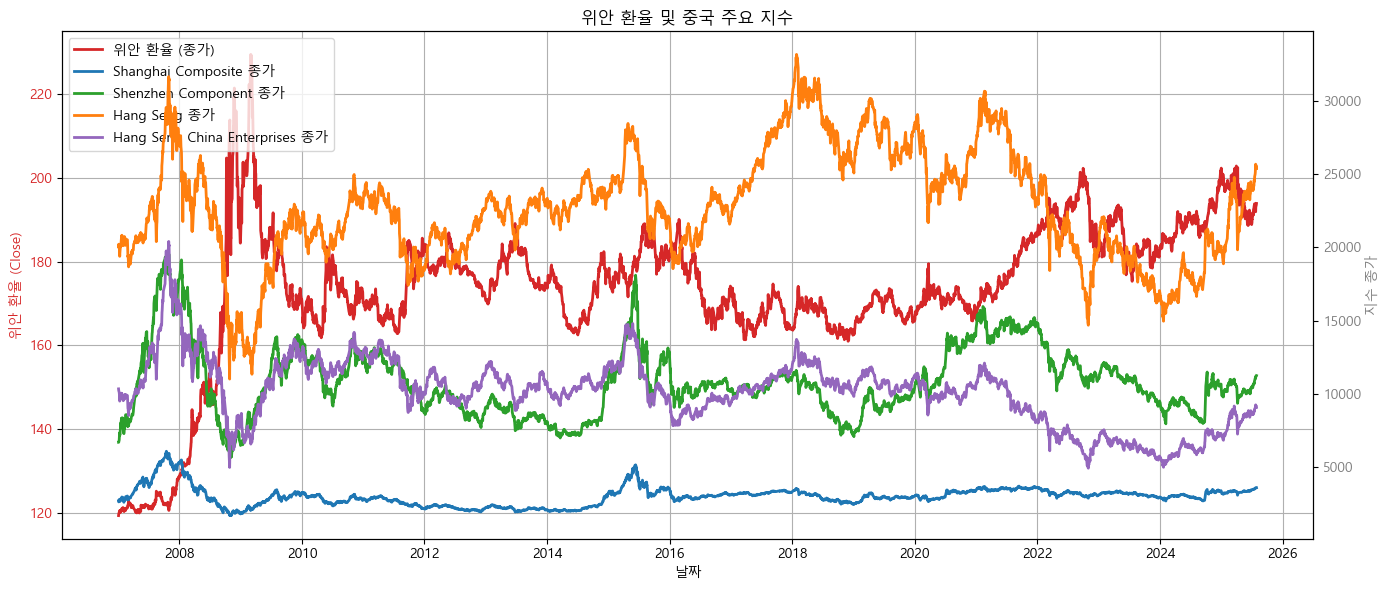

In [23]:
import matplotlib.pyplot as plt

# Ïù¥Ï§ë Ï∂ï ÏÉùÏÑ±
fig, ax1 = plt.subplots(figsize=(14, 6))

# ÏôºÏ™Ω yÏ∂ï: ÏúÑÏïà ÌôòÏú® (Close)
ax1.plot(df_base['Date'], df_base['Close'], label='ÏúÑÏïà ÌôòÏú® (Ï¢ÖÍ∞Ä)', color='tab:red', linewidth=2)
ax1.set_xlabel("ÎÇ†Ïßú")
ax1.set_ylabel("ÏúÑÏïà ÌôòÏú® (Close)", color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')
ax1.grid(True)

# Ïò§Î•∏Ï™Ω yÏ∂ï: Ï§ëÍµ≠ Ï£ºÏöî ÏßÄÏàò
ax2 = ax1.twinx()
ax2.plot(df_base['Date'], df_base['Shanghai Composite_Close'], label='Shanghai Composite Ï¢ÖÍ∞Ä', color='tab:blue', linewidth=2)
ax2.plot(df_base['Date'], df_base['Shenzhen Component_Close'], label='Shenzhen Component Ï¢ÖÍ∞Ä', color='tab:green', linewidth=2)
ax2.plot(df_base['Date'], df_base['Hang Seng_Close'], label='Hang Seng Ï¢ÖÍ∞Ä', color='tab:orange', linewidth=2)
ax2.plot(df_base['Date'], df_base['Hang Seng China Enterprises_Close'], label='Hang Seng China Enterprises Ï¢ÖÍ∞Ä', color='tab:purple', linewidth=2)
ax2.set_ylabel("ÏßÄÏàò Ï¢ÖÍ∞Ä", color='tab:gray')
ax2.tick_params(axis='y', labelcolor='tab:gray')

# Î≤îÎ°Ä Î≥ëÌï©
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

# Ï†úÎ™©Í≥º Î†àÏù¥ÏïÑÏõÉ
plt.title("ÏúÑÏïà ÌôòÏú® Î∞è Ï§ëÍµ≠ Ï£ºÏöî ÏßÄÏàò")
plt.tight_layout()
plt.show()

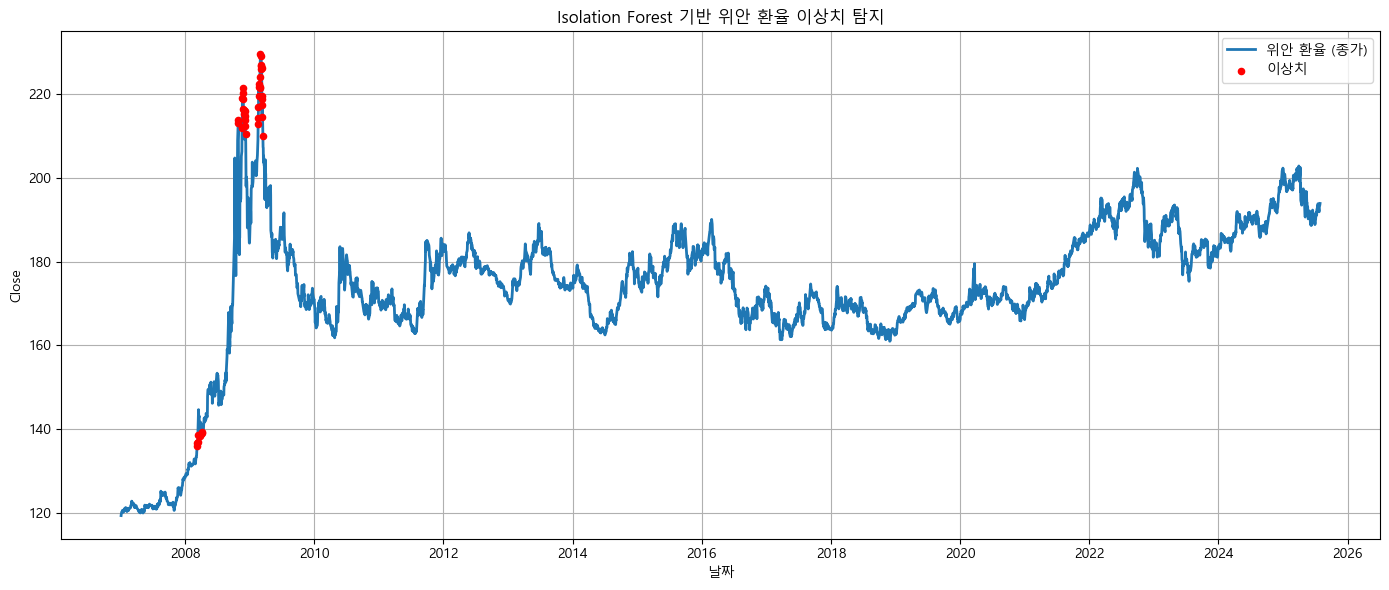

In [25]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# 1. Í≤∞Ï∏° Ï†úÍ±∞ Î∞è Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()
df = df[['Date', 'Close']].dropna()

# 2. Isolation Forest Ï†ÅÏö©
model = IsolationForest(contamination=0.01, random_state=42)
df['anomaly'] = model.fit_predict(df[['Close']])

# 3. Ïù¥ÏÉÅÏπò Ï∂îÏ∂ú
anomalies = df[df['anomaly'] == -1]

# 4. ÏãúÍ∞ÅÌôî
plt.figure(figsize=(14, 6))
plt.plot(df['Date'], df['Close'], label='ÏúÑÏïà ÌôòÏú® (Ï¢ÖÍ∞Ä)', color='tab:blue', linewidth=2)
plt.scatter(anomalies['Date'], anomalies['Close'], color='red', label='Ïù¥ÏÉÅÏπò', s=20, zorder=5)
plt.title("Isolation Forest Í∏∞Î∞ò ÏúÑÏïà ÌôòÏú® Ïù¥ÏÉÅÏπò ÌÉêÏßÄ")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ÌïòÎ£® ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 26ms/step
üìä XGBoost
    MAE:  1.8998
    RMSE: 2.4294
    R¬≤:   0.8123
üìä LSTM
    MAE:  1.2782
    RMSE: 1.6763
    R¬≤:   0.9106
üìä RandomForest
    MAE:  1.4079
    RMSE: 1.8050
    R¬≤:   0.8964


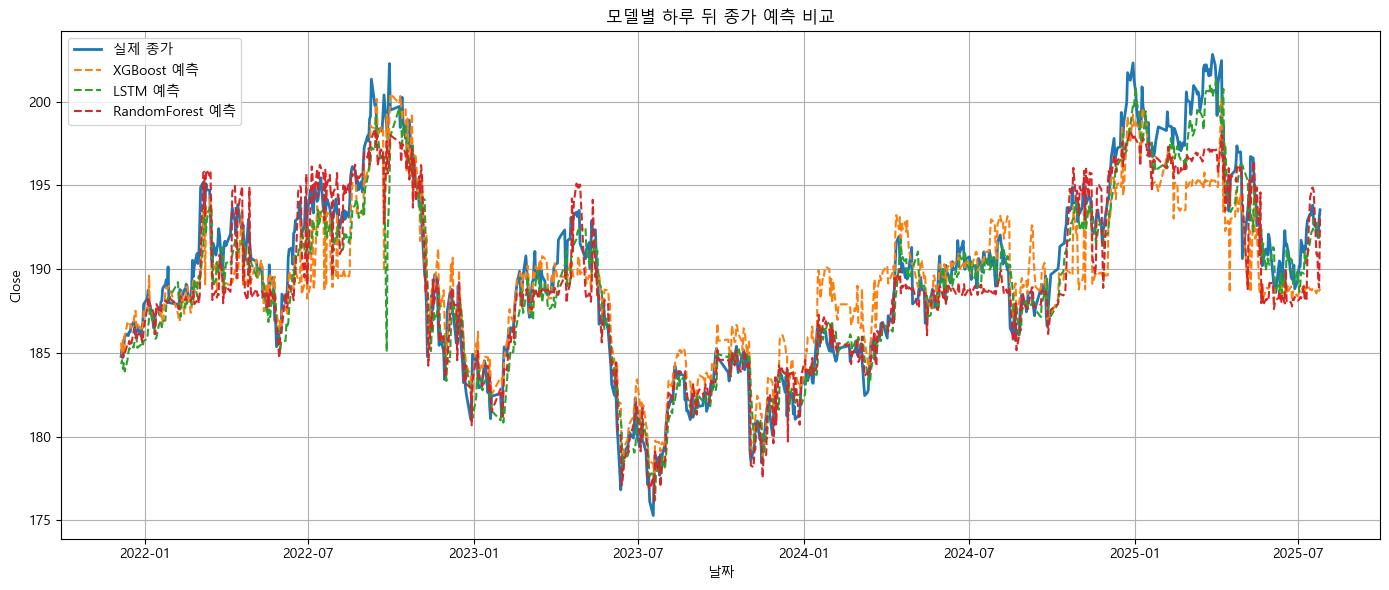

In [124]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-1)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÌïòÎ£® Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [126]:
import joblib
joblib.dump(model_lstm, 'yuan_ÌïòÎ£®.pkl')
joblib.dump(scaler_X, 'yuan_scaler_X_ÌïòÎ£®.pkl')
joblib.dump(scaler_y, 'yuan_scaler_y_ÌïòÎ£®.pkl')

['yuan_scaler_y_ÌïòÎ£®.pkl']

# ÏùºÏ£ºÏùº ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step
üìä XGBoost
    MAE:  4.0749
    RMSE: 5.1272
    R¬≤:   0.1640
üìä LSTM
    MAE:  3.7941
    RMSE: 4.3109
    R¬≤:   0.4090
üìä RandomForest
    MAE:  3.5313
    RMSE: 4.6039
    R¬≤:   0.3260


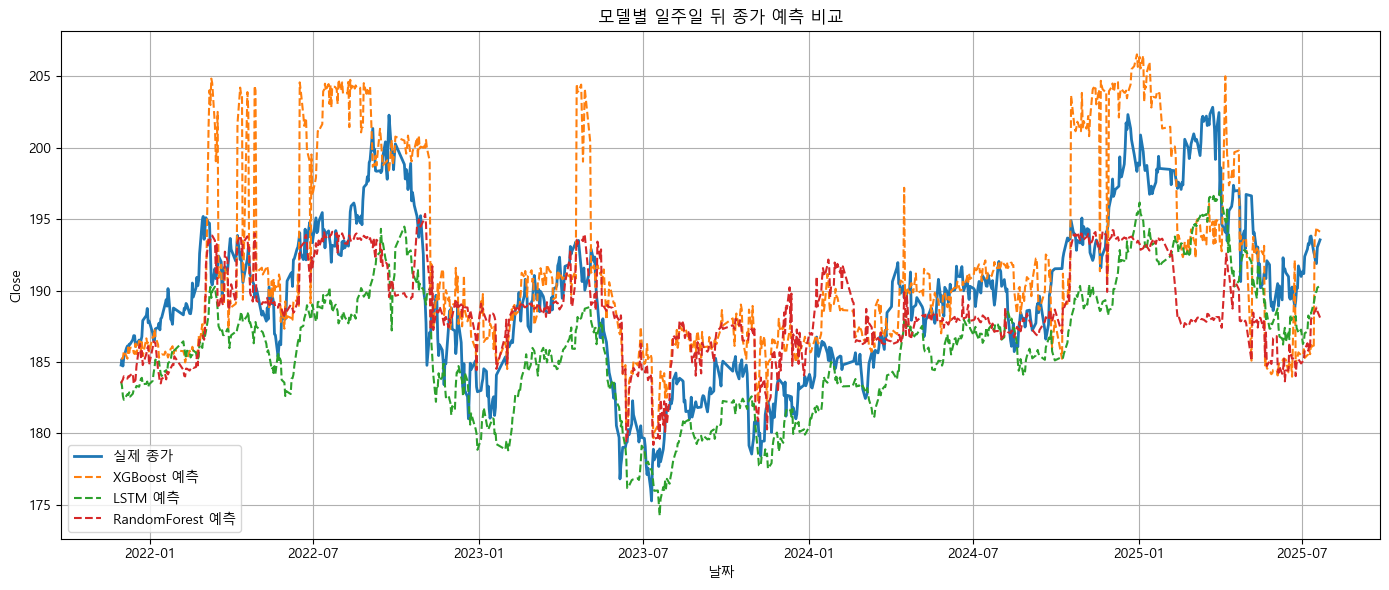

In [127]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-5)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÏùºÏ£ºÏùº Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [128]:
import joblib
joblib.dump(model_lstm, 'yuan_ÏùºÏ£ºÏùº.pkl')
joblib.dump(scaler_X, 'yuan_scaler_X_ÏùºÏ£ºÏùº.pkl')
joblib.dump(scaler_y, 'yuan_scaler_y_ÏùºÏ£ºÏùº.pkl')

['yuan_scaler_y_ÏùºÏ£ºÏùº.pkl']

# ÌïúÎã¨ ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 11ms/step
üìä XGBoost
    MAE:  6.6114
    RMSE: 7.8961
    R¬≤:   -0.9806
üìä LSTM
    MAE:  6.8449
    RMSE: 7.7611
    R¬≤:   -0.9135
üìä RandomForest
    MAE:  6.0727
    RMSE: 7.2892
    R¬≤:   -0.6879


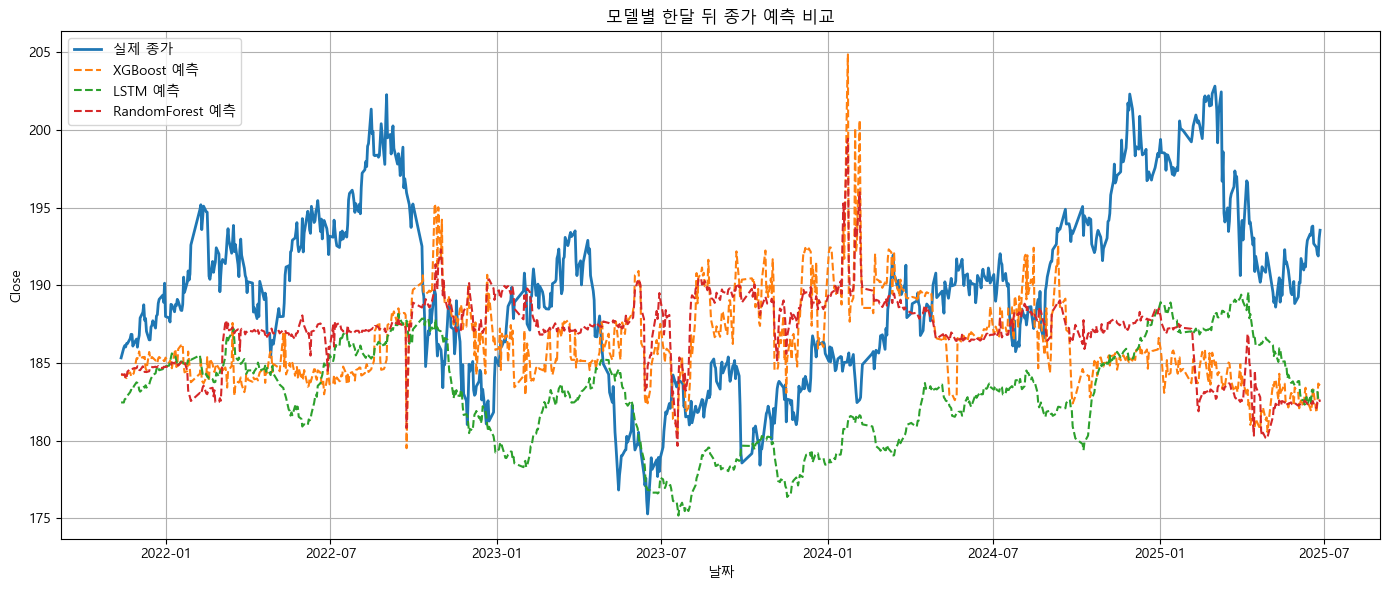

In [129]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-20)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÌïúÎã¨ Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [130]:
import joblib
joblib.dump(model_rf, 'yuan_ÌïúÎã¨.pkl')
joblib.dump(scaler_X, 'yuan_scaler_X_ÌïúÎã¨.pkl')
joblib.dump(scaler_y, 'yuan_scaler_y_ÌïúÎã¨.pkl')

['yuan_scaler_y_ÌïúÎã¨.pkl']

# ÏÑ∏Îã¨ ÏòàÏ∏°

C:\Users\campus4D044\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


27/27 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 12ms/step
üìä XGBoost
    MAE:  11.2937
    RMSE: 12.5784
    R¬≤:   -3.9971
üìä LSTM
    MAE:  14.2085
    RMSE: 15.2078
    R¬≤:   -6.3047
üìä RandomForest
    MAE:  10.2770
    RMSE: 11.9255
    R¬≤:   -3.4918


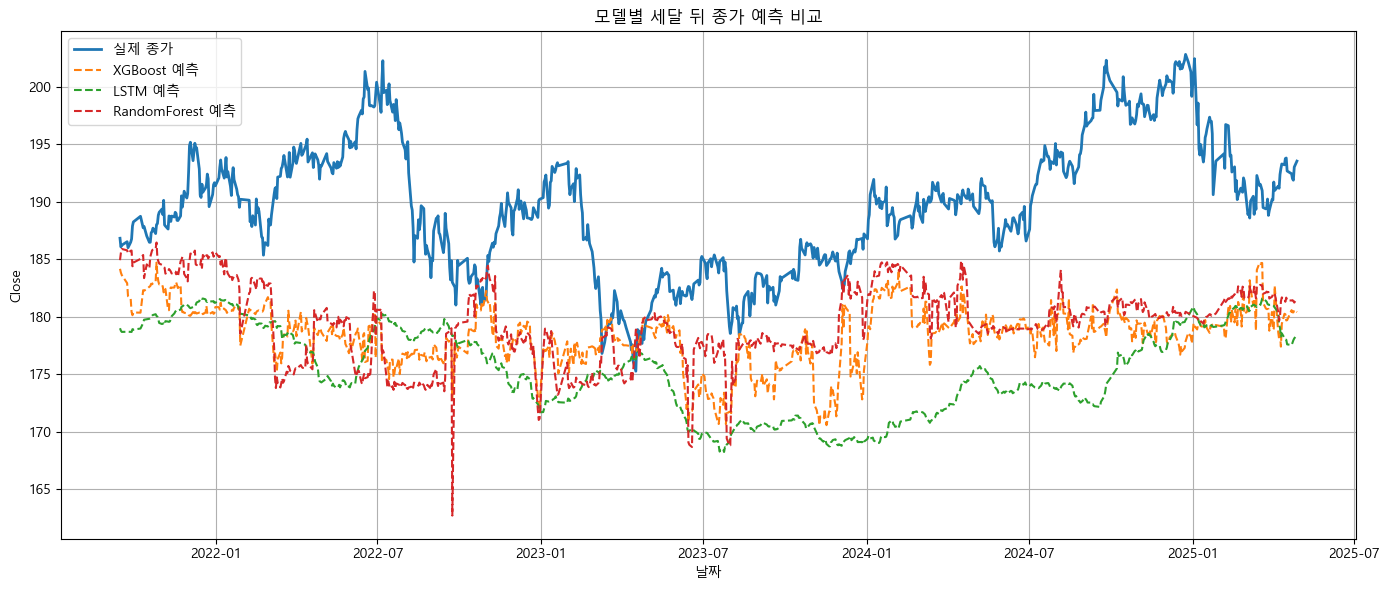

In [131]:
# 1. ÎùºÏù¥Î∏åÎü¨Î¶¨
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from xgboost import XGBRegressor
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping

# 2. Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
df = df_base.copy()  # Í∏∞Ï°¥ df_baseÎ•º Ïú†ÏßÄ
df = df.sort_values('Date')
df['Date'] = pd.to_datetime(df['Date'])
df['target'] = df['Close'].shift(-60)
df = df.dropna().reset_index(drop=True)

# 3. ÌîºÏ≤ò, ÌÉÄÍ≤ü ÏÑ§Ï†ï
drop_cols = ['Date', 'Í∏∞Ï§ÄÎÖÑÏõî', 'return', 'return_future', 'target', 'next_day_close']
X = df.drop(columns=drop_cols, errors='ignore')
y = df['target'].values

# 4. ÌïôÏäµ/ÌÖåÏä§Ìä∏ Î∂ÑÌï†
split_idx = int(len(df) * 0.8)
X_train_raw, X_test_raw = X.iloc[:split_idx], X.iloc[split_idx:]
y_train_raw, y_test_raw = y[:split_idx], y[split_idx:]

# 5. Ï†ïÍ∑úÌôî
scaler_X = MinMaxScaler().fit(X_train_raw)
X_train_scaled = scaler_X.transform(X_train_raw)
X_test_scaled = scaler_X.transform(X_test_raw)

scaler_y = MinMaxScaler().fit(y_train_raw.reshape(-1, 1))
y_train_scaled = scaler_y.transform(y_train_raw.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test_raw.reshape(-1, 1))

# 6. ÏãúÌÄÄÏä§ ÏÉùÏÑ± Ìï®Ïàò
def make_sequence(X, y, seq_len):
    X_seq, y_seq = [], []
    for i in range(len(X) - seq_len):
        X_seq.append(X[i:i+seq_len])
        y_seq.append(y[i+seq_len])
    return np.array(X_seq), np.array(y_seq)

seq_len = 20
X_train_seq, y_train_seq = make_sequence(X_train_scaled, y_train_scaled, seq_len)
X_test_seq, y_test_seq = make_sequence(X_test_scaled, y_test_scaled, seq_len)

X_train_flat = X_train_scaled[seq_len:][:len(X_train_seq)]
X_test_flat  = X_test_scaled[seq_len:][:len(X_test_seq)]
y_train_flat = y_train_scaled[seq_len:][:len(X_train_seq)]
y_test_flat  = y_test_scaled[seq_len:][:len(X_test_seq)]

# 7. Î™®Îç∏ ÌõàÎ†® Î∞è ÏòàÏ∏°
## XGBoost
model_xgb = XGBRegressor(n_estimators=200, learning_rate=0.05, random_state=42)
model_xgb.fit(X_train_flat, y_train_flat.ravel())
y_pred_xgb = scaler_y.inverse_transform(model_xgb.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

## LSTM
model_lstm = Sequential()
model_lstm.add(LSTM(128, input_shape=(seq_len, X_train_seq.shape[2])))
model_lstm.add(Dense(1))
model_lstm.compile(optimizer='adam', loss='mse')
early_stop = EarlyStopping(patience=15, restore_best_weights=True)
model_lstm.fit(X_train_seq, y_train_seq, epochs=100, batch_size=32, validation_split=0.2,
               callbacks=[early_stop], verbose=0)
y_pred_lstm = scaler_y.inverse_transform(model_lstm.predict(X_test_seq)).reshape(-1)

## RandomForest
model_rf = RandomForestRegressor(n_estimators=200, random_state=42)
model_rf.fit(X_train_flat, y_train_flat.ravel())
y_pred_rf = scaler_y.inverse_transform(model_rf.predict(X_test_flat).reshape(-1, 1)).reshape(-1)

# 8. Ïã§Ï†úÍ∞í Î≥µÏõê
y_true = scaler_y.inverse_transform(y_test_seq).reshape(-1)

# 9. ÏÑ±Îä• Ï∂úÎ†•
for name, pred in zip(['XGBoost', 'LSTM', 'RandomForest'],
                      [y_pred_xgb, y_pred_lstm, y_pred_rf]):
    rmse = np.sqrt(mean_squared_error(y_true, pred))
    mae = mean_absolute_error(y_true, pred)
    r2 = r2_score(y_true, pred)
    print(f"üìä {name}")
    print(f"    MAE:  {mae:.4f}")
    print(f"    RMSE: {rmse:.4f}")
    print(f"    R¬≤:   {r2:.4f}")

# 10. ÏãúÍ∞ÅÌôî
date_test = df['Date'].iloc[seq_len + split_idx:].reset_index(drop=True)
n = min(len(date_test), len(y_true), len(y_pred_xgb), len(y_pred_lstm), len(y_pred_rf))

plt.figure(figsize=(14, 6))
plt.plot(date_test[:n], y_true[:n], label='Ïã§Ï†ú Ï¢ÖÍ∞Ä', linewidth=2)
plt.plot(date_test[:n], y_pred_xgb[:n], label='XGBoost ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_lstm[:n], label='LSTM ÏòàÏ∏°', linestyle='--')
plt.plot(date_test[:n], y_pred_rf[:n], label='RandomForest ÏòàÏ∏°', linestyle='--')
plt.title("Î™®Îç∏Î≥Ñ ÏÑ∏Îã¨ Îí§ Ï¢ÖÍ∞Ä ÏòàÏ∏° ÎπÑÍµê")
plt.xlabel("ÎÇ†Ïßú")
plt.ylabel("Close")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


In [132]:
import joblib
joblib.dump(model_rf, 'yuan_ÏÑ∏Îã¨.pkl')
joblib.dump(scaler_X, 'yuan_scaler_X_ÏÑ∏Îã¨.pkl')
joblib.dump(scaler_y, 'yuan_scaler_y_ÏÑ∏Îã¨.pkl')

['yuan_scaler_y_ÏÑ∏Îã¨.pkl']

|Î™®Îç∏|ÌïòÎ£®|ÏùºÏ£ºÏùº|ÌïúÎã¨|ÏÑ∏Îã¨|
|---|---|---|---|---|
|XGBoost|0.8123|0.1640|-0.9806|-3.9971|
|LSTM|0.9106|0.4090|-0.9135|-6.3047|
|RandomForest|0.8964|0.3260|-0.6879|-3.4918|
||||||
|ÏµúÏ¢ÖÎ™®Îç∏|LSTM|LSTM|RandomForest|RandomForest

In [138]:
def yuan_predict_ÌïòÎ£®(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yuan_scaler_X_ÌïòÎ£®.pkl')

    scaler_y = joblib.load(f'yuan_scaler_y_ÌïòÎ£®.pkl')
    
    model_lstm = joblib.load(f'yuan_ÌïòÎ£®.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_lstm

import cloudpickle
with open("yuan_predict_ÌïòÎ£®.pkl", "wb") as f:
    cloudpickle.dump(yuan_predict_ÌïòÎ£®, f)

In [139]:
def yuan_predict_ÏùºÏ£ºÏùº(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yuan_scaler_X_ÏùºÏ£ºÏùº.pkl')

    scaler_y = joblib.load(f'yuan_scaler_y_ÏùºÏ£ºÏùº.pkl')
    
    model_lstm = joblib.load(f'yuan_ÏùºÏ£ºÏùº.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_seq = []
    for i in range(len(X_new_scaled) - seq_len):
        X_new_seq.append(X_new_scaled[i:i+seq_len])
    X_new_seq = np.array(X_new_seq)

    y_pred_lstm = model_lstm.predict(X_new_seq)

    y_pred_lstm = scaler_y.inverse_transform(y_pred_lstm).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_lstm

with open("yuan_predict_ÏùºÏ£ºÏùº.pkl", "wb") as f:
    cloudpickle.dump(yuan_predict_ÏùºÏ£ºÏùº, f)

In [140]:
def yuan_predict_ÌïúÎã¨(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yuan_scaler_X_ÌïúÎã¨.pkl')

    scaler_y = joblib.load(f'yuan_scaler_y_ÌïúÎã¨.pkl')
    
    model_rf = joblib.load(f'yuan_ÌïúÎã¨.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_flat = X_new_scaled[seq_len:]

    y_pred_rf = model_rf.predict(X_new_flat)
    
    y_pred_rf = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1)).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_rf

with open("yuan_predict_ÌïúÎã¨.pkl", "wb") as f:
    cloudpickle.dump(yuan_predict_ÌïúÎã¨, f)

In [141]:
def yuan_predict_ÏÑ∏Îã¨(new_df):
    import joblib
    
    scaler_X = joblib.load(f'yuan_scaler_X_ÏÑ∏Îã¨.pkl')

    scaler_y = joblib.load(f'yuan_scaler_y_ÏÑ∏Îã¨.pkl')
    
    model_rf = joblib.load(f'yuan_ÏÑ∏Îã¨.pkl')

    X_new = new_df.drop(columns=drop_cols, errors='ignore')
    X_new_scaled = scaler_X.transform(X_new)

    X_new_flat = X_new_scaled[seq_len:]

    y_pred_rf = model_rf.predict(X_new_flat)
    
    y_pred_rf = scaler_y.inverse_transform(y_pred_rf.reshape(-1, 1)).reshape(-1)

    # 6. Í≤∞Í≥º Î∞òÌôò
    return y_pred_rf

with open("yuan_predict_ÏÑ∏Îã¨.pkl", "wb") as f:
    cloudpickle.dump(yuan_predict_ÏÑ∏Îã¨, f)

In [134]:
print(list(X))

['Shanghai Composite_Open', 'Shanghai Composite_High', 'Shanghai Composite_Low', 'Shanghai Composite_Close', 'Shenzhen Component_Open', 'Shenzhen Component_High', 'Shenzhen Component_Low', 'Shenzhen Component_Close', 'Hang Seng_Open', 'Hang Seng_High', 'Hang Seng_Low', 'Hang Seng_Close', 'Hang Seng China Enterprises_Open', 'Hang Seng China Enterprises_High', 'Hang Seng China Enterprises_Low', 'Hang Seng China Enterprises_Close', 'Close', 'Open', 'High', 'Low', 'Change']


In [167]:
def yuan_predict(timelength):
    import pickle

    yuan_df=pd.read_csv('yuan_df.csv')

    with open('yuan_real_times.pkl', 'rb') as f:
        yuan_real_times = pickle.load(f)
        
    with open('yuan_indicator.pkl', 'rb') as f:
        yuan_indicator = pickle.load(f)

    yuan_df['Date']=pd.to_datetime(yuan_df['Date'])

    yuan_df=pd.concat([yuan_df,CNYKRW()],ignore_index=True).drop_duplicates(subset='Date',keep='last')
    yuan_df["Change"] = yuan_df["Close"].diff()
    yuan_df.to_csv('yuan_df.csv',index=False)
    
    new_df=pd.merge(yuan_df,yuan_indicator(),on='Date').tail(21)
    X_new = new_df[['Shanghai Composite_Open', 'Shanghai Composite_High', 'Shanghai Composite_Low', 'Shanghai Composite_Close', 'Shenzhen Component_Open', 'Shenzhen Component_High', 'Shenzhen Component_Low', 'Shenzhen Component_Close', 'Hang Seng_Open', 'Hang Seng_High', 'Hang Seng_Low', 'Hang Seng_Close', 'Hang Seng China Enterprises_Open', 'Hang Seng China Enterprises_High', 'Hang Seng China Enterprises_Low', 'Hang Seng China Enterprises_Close', 'Close', 'Open', 'High', 'Low', 'Change']]

    with open(f'yuan_predict_{timelength}.pkl', 'rb') as f:
        model_predict = pickle.load(f)
        
    result_df = pd.DataFrame({
        "Date": new_df['Date'].iloc[-1],
        "Previous Close": new_df['Close'].iloc[-1],
        "Predicted Close": model_predict(X_new),
        "ÏòàÏ∏°Í≤∞Í≥º": np.where(model_predict(X_new) > new_df['Close'].iloc[-1], "ÏÉÅÏäπ", "ÌïòÎùΩ")
    })
    
    return result_df
    
with open("yuan_predict.pkl", "wb") as f:
    cloudpickle.dump(yuan_predict, f)

In [168]:
yuan_predict('ÏùºÏ£ºÏùº')

C:\Users\campus4D044\AppData\Local\Temp\ipykernel_31848\24424896.py:55: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df = pd.concat([df, pd.DataFrame([new_row])], ignore_index=True)


1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 259ms/step
1/1 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 217ms/step


Date  Previous Close  Predicted Close ÏòàÏ∏°Í≤∞Í≥º
0 2025-07-28          193.55       189.584824   ÌïòÎùΩ